In [12]:
from qiskit import QuantumCircuit, Aer, transpile, assemble
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
import numpy as np
import matplotlib.pyplot as plt
from qiskit_machine_learning.neural_networks import SamplerQNN


import json
import time
import warnings

from quantum import *

In [13]:
from IPython.display import clear_output


In [14]:
#BUILD QUANTUM CIRCUIT
InputStateDimension = 10
EncodedStateDimension = 3
Depth = 3

Encoder = EncoderBuilder(InputStateDimension, EncodedStateDimension, Depth)
Circuit = QuantumCircuit(Encoder.num_qubits, Encoder.num_clbits)
for i in range(Circuit.num_qubits):
    Circuit.reset(i)
for i in range(2,5,1):
    Circuit.x(i)
Circuit.compose(Encoder, inplace=True)
#Circuit.draw('mpl', filename='circuit.png')

In [15]:
# Here we define our interpret for our SamplerQNN
def identity_interpret(x):
    return x

qnn = SamplerQNN(
    circuit=Circuit,
    input_params=[],
    weight_params=Circuit.parameters,
    interpret=identity_interpret,
    output_shape=2,
)

In [16]:
def cost_function(params_values):
    probabilities = qnn.forward([], params_values)
    # we pick a probability of getting 1 as the output of the network
    cost = np.sum(probabilities[:, 1])

    # plotting part
    clear_output(wait=True)
    objective_func_vals.append(cost)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    return cost


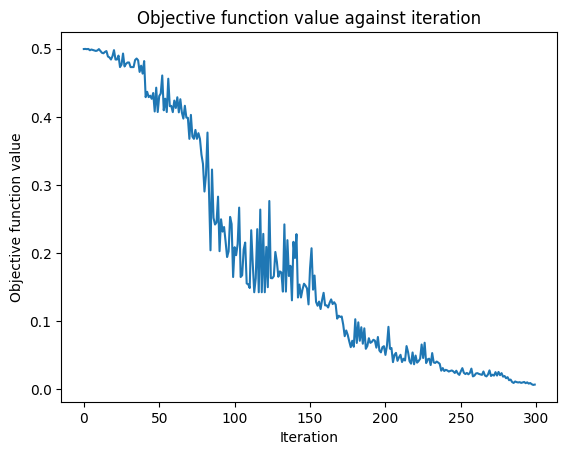

Fit in 118.00 seconds


In [18]:
objective_func_vals = []
# Initialize the COBYLA optimizer
opt = COBYLA(maxiter=300)
num_parameters = Circuit.num_parameters
initial_point = np.random.rand(num_parameters)  # Set the initial parameters
print('Number of parameters in quantum circuit: ',Circuit.num_parameters)
print('Initial parameters in quantum circuit: ',initial_point)

# Perform optimization
start = time.time()
opt_result = opt.minimize(cost_function,initial_point)
#print('Cost function value:', cost_function(initial_point))
elapsed = time.time() - start

print(f"Fit in {elapsed:0.2f} seconds")